In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import warnings
import plotly.express as px
px_template = "simple_white"


%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

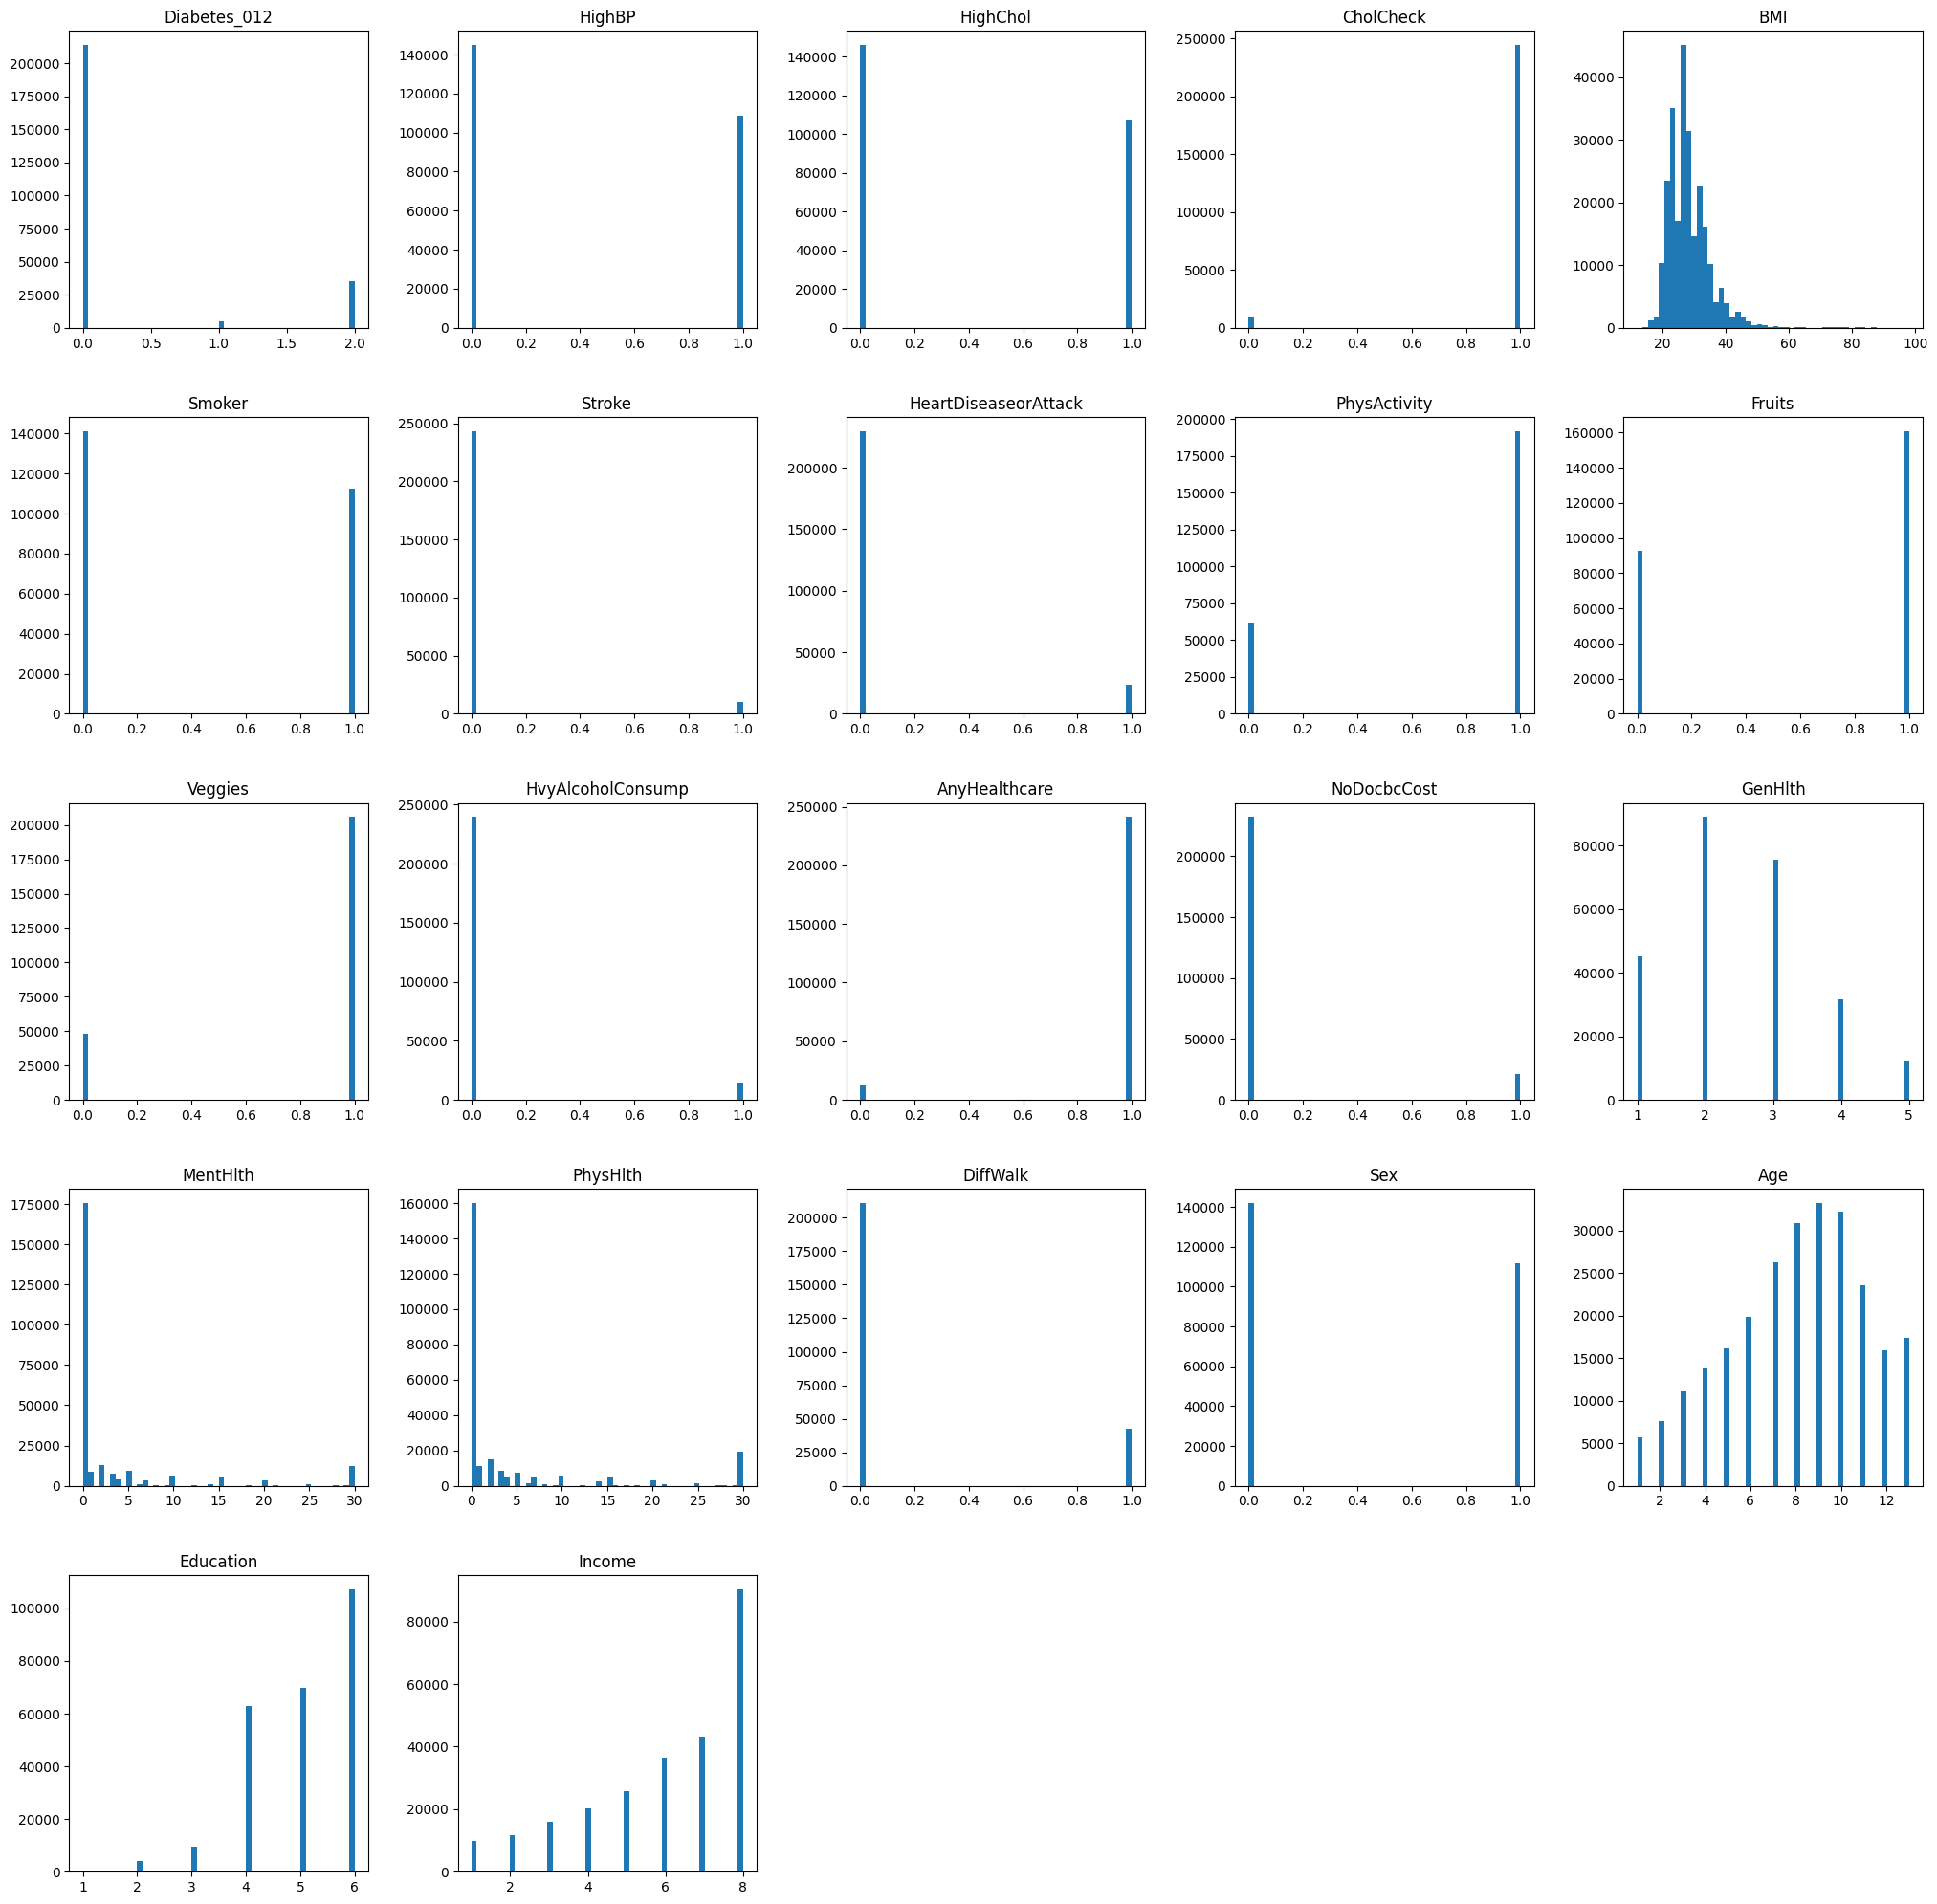

In [ ]:
ax = df.hist(bins = 50, grid = False, figsize = (25,25))

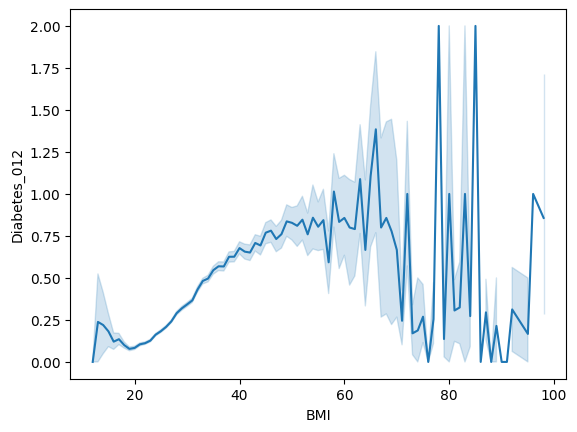

In [ ]:
sns.lineplot(x = 'BMI', y = 'Diabetes_012', data = df)
plt.show()

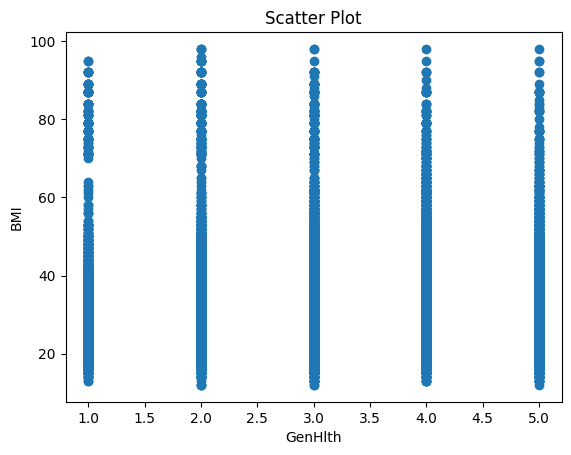

In [ ]:
plt.scatter(data['GenHlth'], data['BMI'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('GenHlth')
plt.ylabel('BMI')
plt.show()


([<matplotlib.patches.Wedge at 0x7ea354de0e20>,
 [Text(6.735557395310444e-17, 1.1, 'non-Diabetic'),
  Text(-2.0206672185931328e-16, -1.1, 'Diabetic')],
 [Text(3.6739403974420595e-17, 0.6, '50.00'),
  Text(-1.1021821192326178e-16, -0.6, '50.00')])

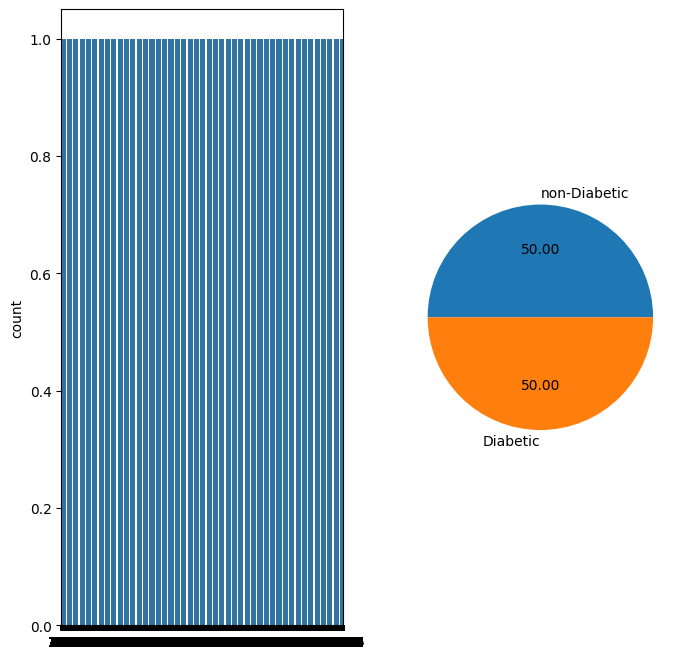

In [ ]:
figure1, plot1 =  plt.subplots(1,2,figsize=(8,8))
sns.countplot(data['Diabetes_012'],ax = plot1[0])

labels = ["non-Diabetic","Diabetic"]
plt.pie(data["Diabetes_012"].value_counts(),labels = labels,autopct='%0.2f')


([<matplotlib.patches.Wedge at 0x7ea3779bb7c0>,
 [Text(-0.2178466729090489, 1.0782127930526786, 'non HighBP'),
  Text(0.21784667290904905, -1.0782127930526784, 'HighBP')],
 [Text(-0.1188254579503903, 0.5881160689378245, '56.35'),
  Text(0.11882545795039037, -0.5881160689378245, '43.65')])

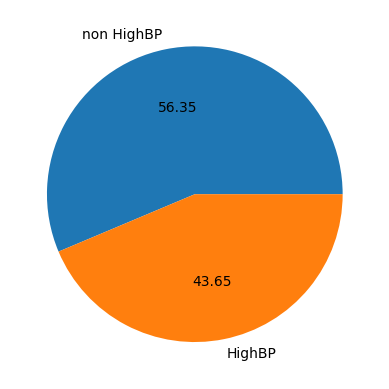

In [ ]:
labels = ['non HighBP','HighBP']
plt.pie(data["HighBP"].value_counts(),labels = labels,autopct='%0.2f')

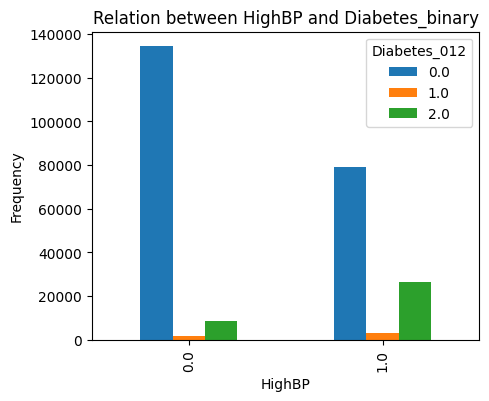

In [ ]:
#checking the relation between HighBP and Diabetes_binary

pd.crosstab(data.HighBP, data.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Relation between HighBP and Diabetes_binary')
plt.xlabel("HighBP")
plt.ylabel('Frequency')
plt.show()


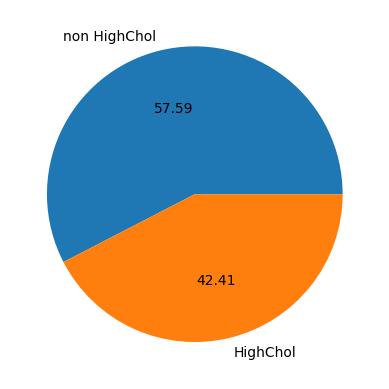

In [ ]:
#relation of HighChol with Diabetes_binary

labels=["non HighChol", "HighChol"]

plt.pie(data["HighChol"].value_counts() , labels =labels ,autopct='%.02f' );

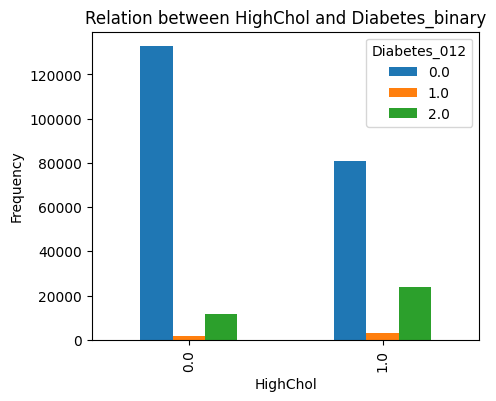

In [ ]:
pd.crosstab(data.HighChol, data.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Relation between HighChol and Diabetes_binary')
plt.xlabel("HighChol")
plt.ylabel('Frequency')
plt.show()


In [ ]:
(data.groupby(["HighBP" , "HighChol"])["Diabetes_012"].value_counts()/data.groupby(["HighBP" , "HighChol"])["Diabetes_012"].count())*100


HighBP  HighChol  Diabetes_012
0.0     0.0       0.0             94.964678
                  2.0              4.188579
                  1.0              0.846743
        1.0       0.0             87.589388
                  2.0             10.419045
                  1.0              1.991568
1.0     0.0       0.0             81.244764
                  2.0             16.733456
                  1.0              2.021780
        1.0       0.0             67.162079
                  2.0             29.713888
                  1.0              3.124033
dtype: float64

Text(0.5, 1.0, 'Relation b/w HighBP ,HighChol and Diabetes')

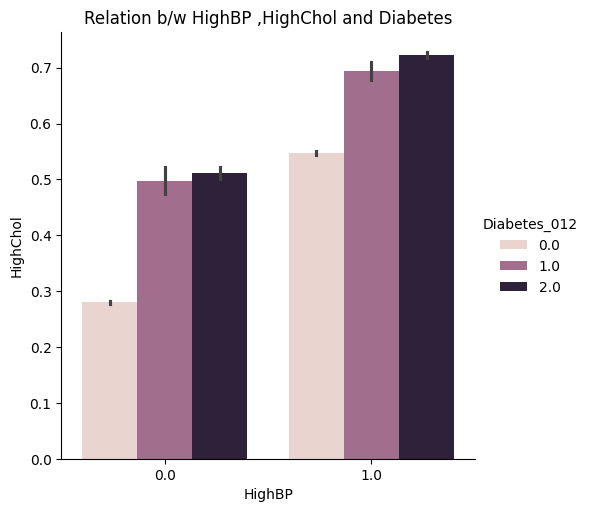

In [ ]:
sns.catplot(x="HighBP" , y ="HighChol" , data = data , hue="Diabetes_012" , kind="bar" );
plt.title("Relation b/w HighBP ,HighChol and Diabetes")

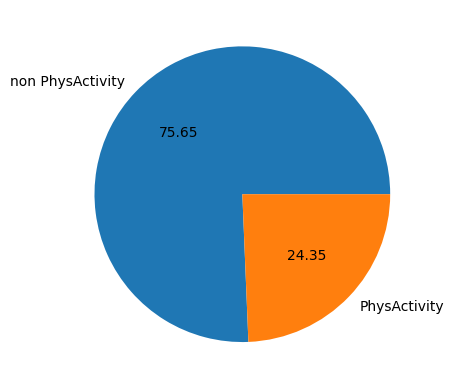

In [7]:
#relation of PhysActivity with Diabetes_binary

labels=["non PhysActivity","PhysActivity"]

plt.pie(data["PhysActivity"].value_counts() , labels =labels ,autopct='%.02f' );


In [8]:
pd.crosstab(data.PhysActivity, data.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
PhysActivity,,,
0.0,47212,1489,13059
1.0,166491,3142,22287


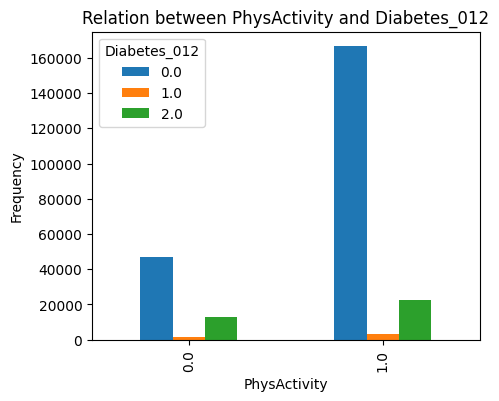

In [9]:
pd.crosstab(data.PhysActivity, data.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Relation between PhysActivity and Diabetes_012')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

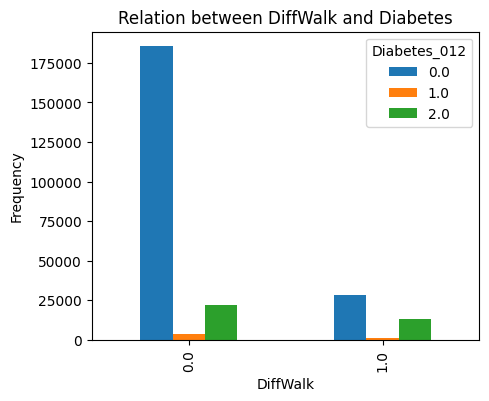

In [ ]:
#checking the relation between DiffWalk and Diabetes_binary

pd.crosstab(data.DiffWalk, data.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Relation between DiffWalk and Diabetes')
plt.xlabel("DiffWalk")
plt.ylabel('Frequency')
plt.show()

In [ ]:
pd.crosstab(data.DiffWalk, data.Diabetes_012).T

DiffWalk,0.0,1.0
Diabetes_012,,
0.0,185434,28269
1.0,3346,1285
2.0,22225,13121


In [ ]:

pd.crosstab(data.Sex, data.Diabetes_012)

Diabetes_012,0.0,1.0,2.0
Sex,,,
0.0,120959,2604,18411
1.0,92744,2027,16935


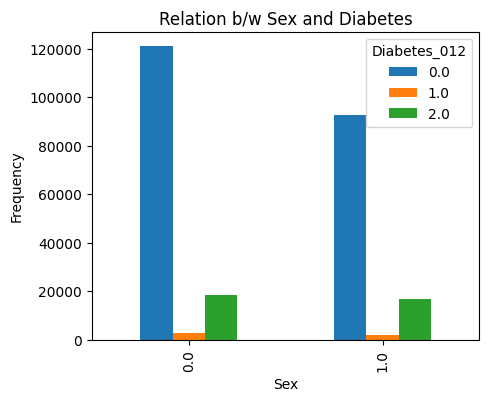

In [ ]:
#checking the relation b/w Sex and Diabetes

pd.crosstab(data.Sex, data.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Relation b/w Sex and Diabetes')
plt.xlabel("Sex")
plt.ylabel('Frequency')
plt.show()

In [15]:
#MentHlth vs Diabetes_binary

pd.crosstab(data.MentHlth, data.Diabetes_012).T

MentHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0.0,149321,7606,11315,6332,3217,7626,796,2632,516,69,...,170,50,28,25,882,35,66,263,125,8959
1.0,2956,120,231,125,83,181,28,63,13,9,...,9,2,2,2,33,3,1,7,3,361
2.0,23403,812,1508,924,489,1223,164,405,110,13,...,48,11,8,6,273,7,12,57,30,2768


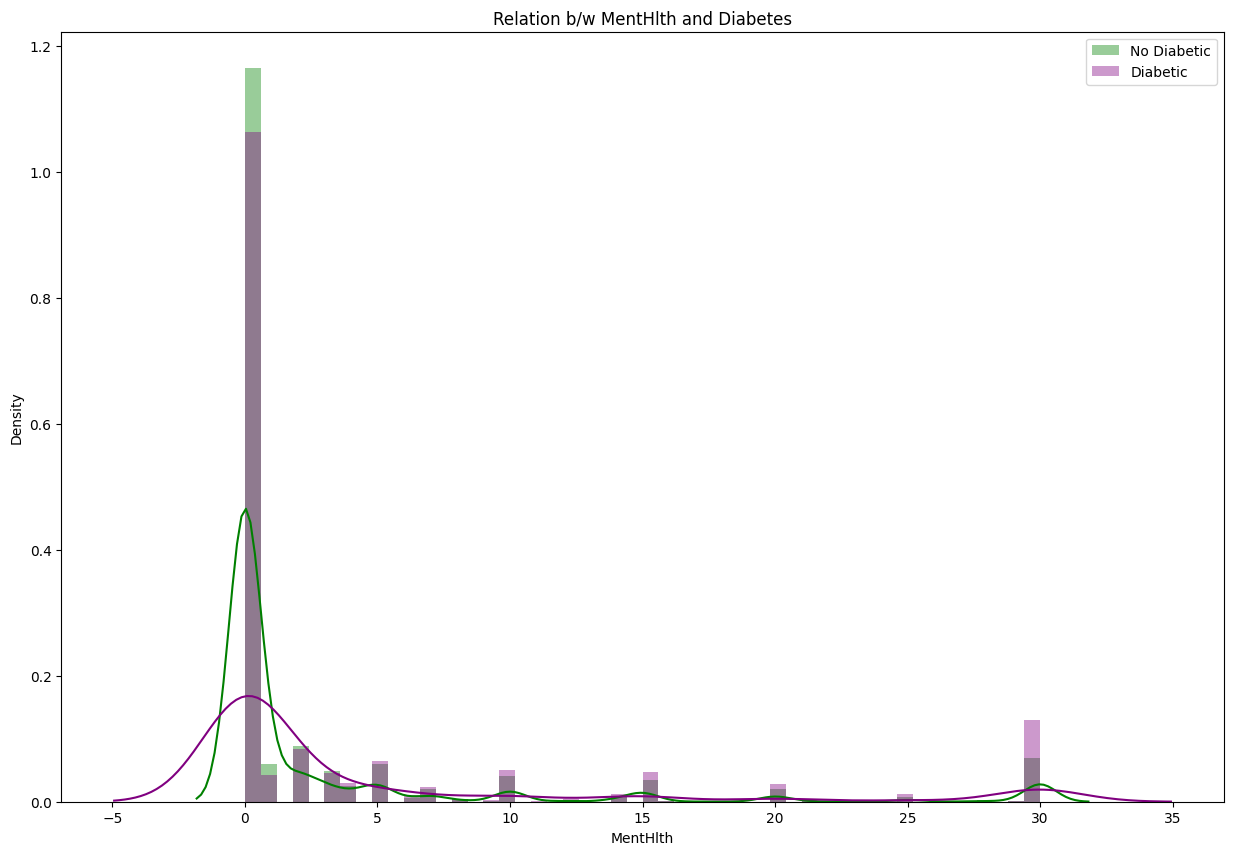

In [13]:
plt.figure(figsize=(15, 10))
warnings.filterwarnings('ignore')

sns.distplot(data.MentHlth[data.Diabetes_012 == 0], color="green", label="No Diabetic" )
sns.distplot(data.MentHlth[data.Diabetes_012 == 1], color="purple", label="Diabetic" )
plt.title("Relation b/w MentHlth and Diabetes")

plt.legend()

In [16]:
#PhysHlth vs Diabetes_binary

pd.crosstab(data.PhysHlth, data.Diabetes_012).T

PhysHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0.0,140841,10026,12488,7033,3681,6140,1010,3705,629,138,...,506,43,37,54,906,43,75,363,134,13116
1.0,2471,174,248,173,98,168,38,90,21,5,...,18,4,3,3,36,4,3,16,7,558
2.0,16740,1188,2028,1289,763,1314,282,743,159,36,...,139,23,16,15,394,22,21,143,74,5726


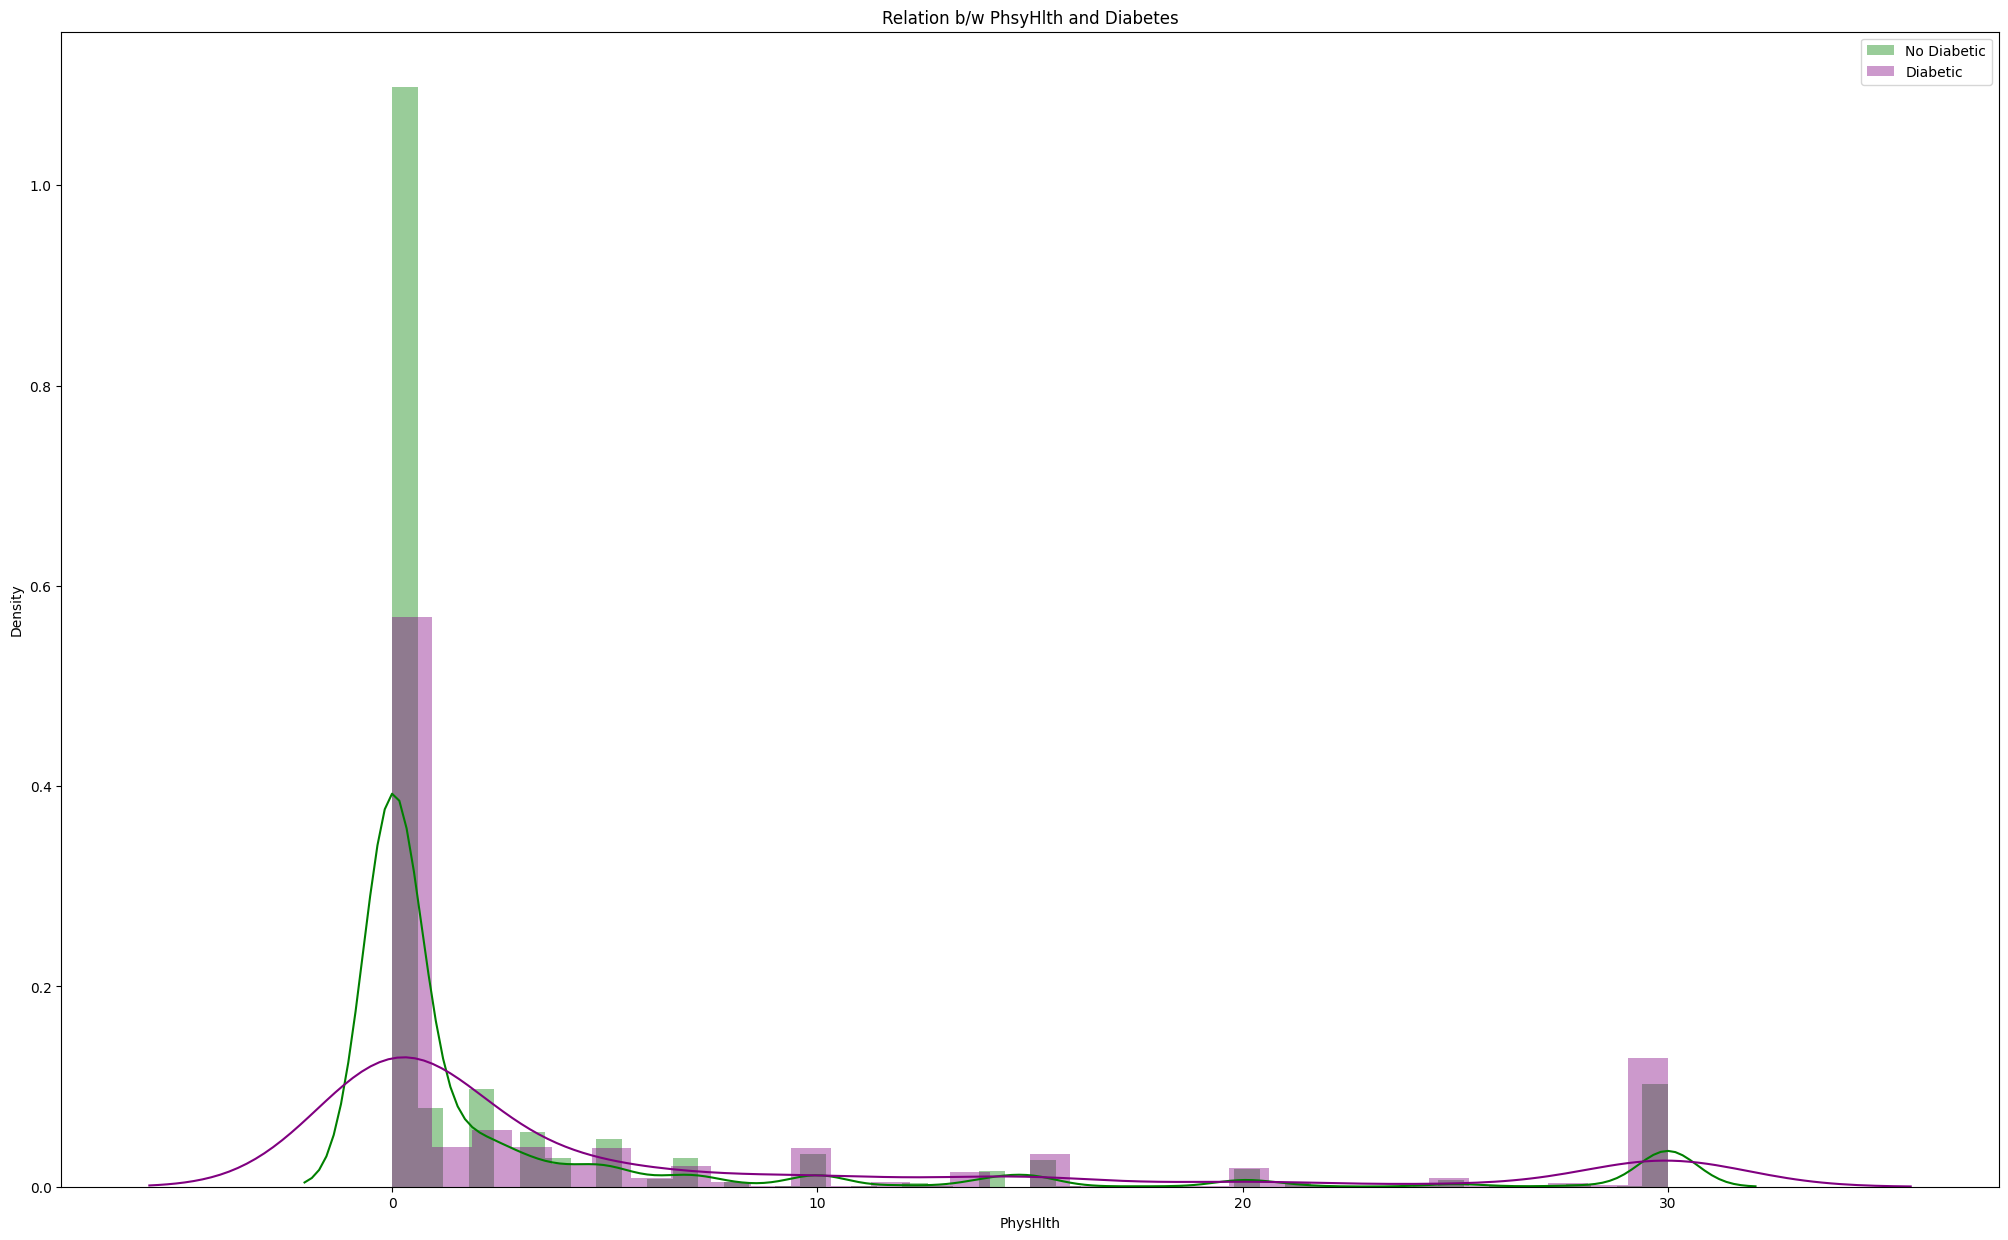

In [17]:

plt.figure(figsize=(25, 15))
warnings.filterwarnings('ignore')

sns.distplot(data.PhysHlth[data.Diabetes_012 == 0], color="green", label="No Diabetic" )
sns.distplot(data.PhysHlth[data.Diabetes_012 == 1], color="purple", label="Diabetic" )
plt.title("Relation b/w PhsyHlth and Diabetes")

plt.legend()

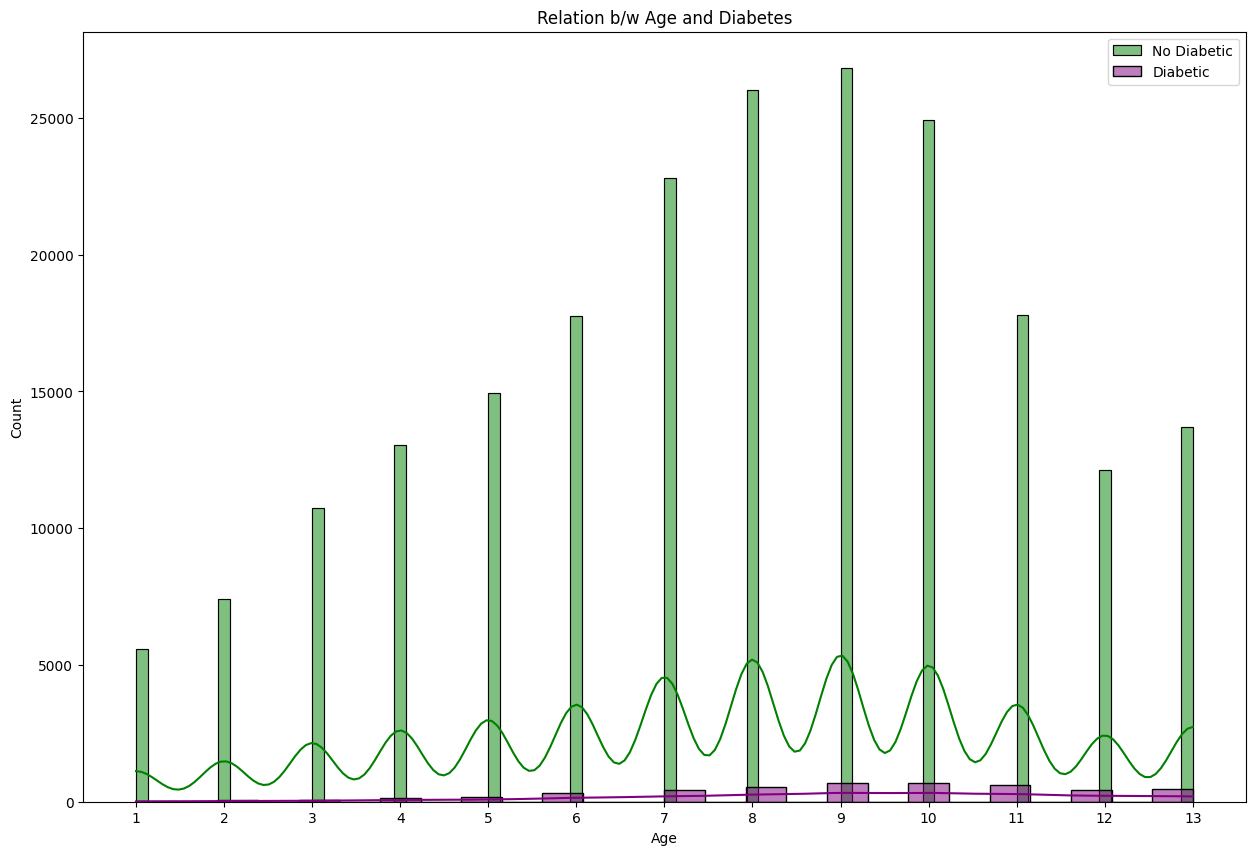

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data.Age[data.Diabetes_012 == 0], color="green", label="No Diabetic" , kde = True )
sns.histplot(data.Age[data.Diabetes_012 == 1], color="purple", label="Diabetic" , kde = True )
plt.title("Relation b/w Age and Diabetes")

plt.xticks(data["Age"].unique())
plt.legend()

<ipython-input-13-f7a60a7a8589>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y='BMI', data=df, palette='Set2')


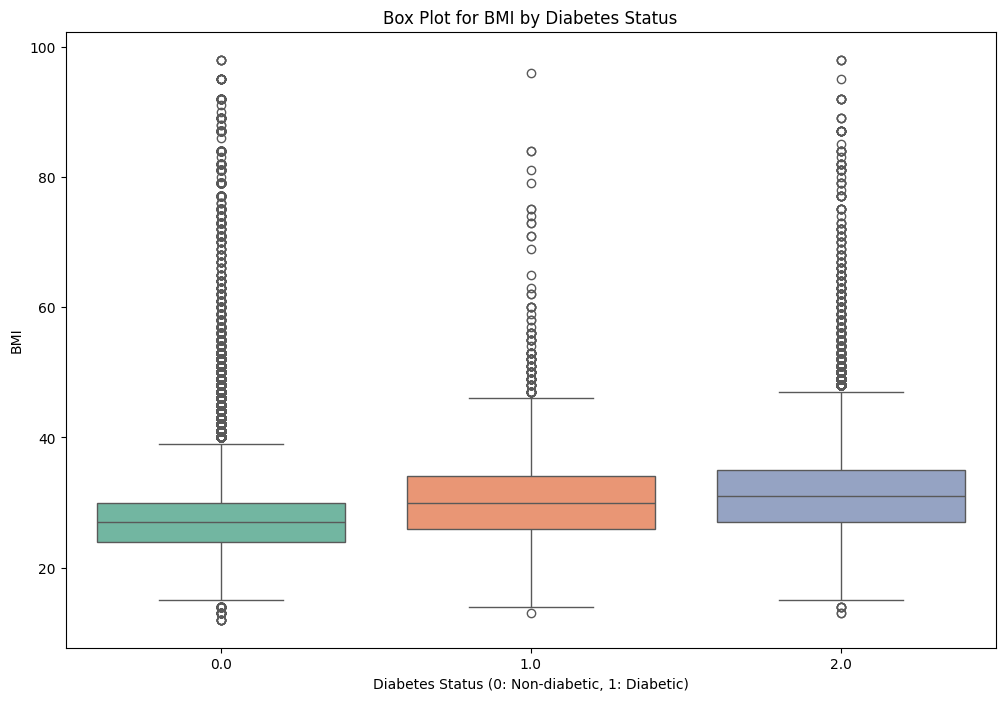

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Box plot for BMI by Diabetes Status
sns.boxplot(x='Diabetes_012', y='BMI', data=df, palette='Set2')

# Set plot title and labels
plt.title('Box Plot for BMI by Diabetes Status')
plt.xlabel('Diabetes Status (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('BMI')

# Show the plot
plt.show()


<ipython-input-14-de9b270b34ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Stroke', data=df, palette='pastel')


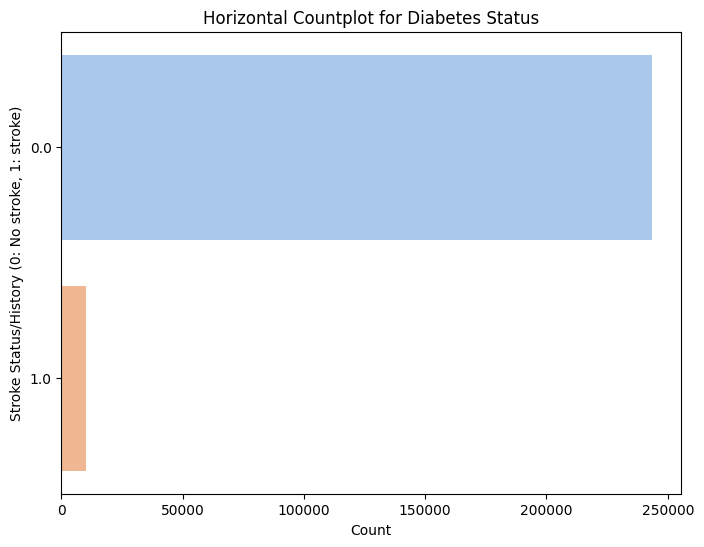

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Horizontal Countplot for Diabetes_binary
sns.countplot(y='Stroke', data=df, palette='pastel')

# Set plot title and labels
plt.title('Horizontal Countplot for Diabetes Status')
plt.xlabel('Count')
plt.ylabel('Stroke Status/History (0: No stroke, 1: stroke)')

# Show the plot
plt.show()